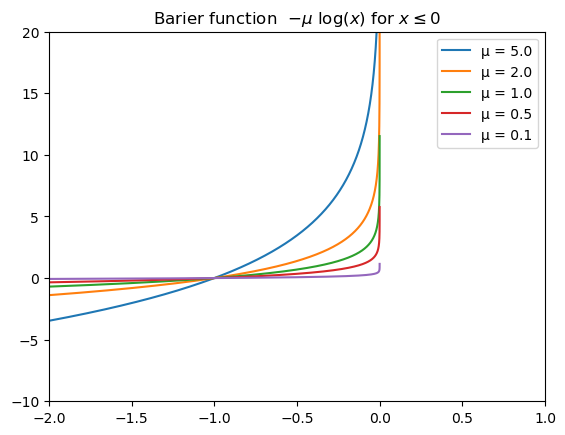

PyObject <matplotlib.legend.Legend object at 0x158004358>

In [7]:
using PyPlot

ϵ = 0.0000001
x = -2+ϵ:0.00001:0-ϵ
y = x
f_1(x) = x
#f_2(x) = -x +1

f(X,μ) = [ - μ*log(-f_1(x))  for x in X]

for μ in [5,2,1,0.5,0.1]
    plot(x,f(x,μ), label = "μ = $μ")
    
end


title(L"Barier function  $ -\mu\ \log(x)$ for $x \leq 0$")
xlim(-2,1);
ylim(-10,20);
legend()

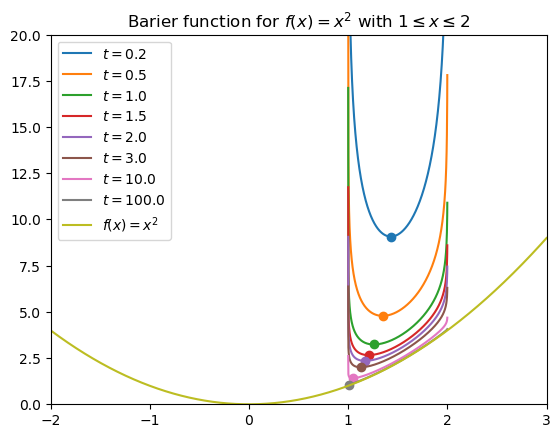

PyObject <matplotlib.legend.Legend object at 0x1441c6b38>

In [57]:
using PyPlot

ϵ = 0.0000001
X = (1+ϵ):0.001:(2-ϵ)
f_1(x) = x-2
f_2(x) = 1-x

function c(t)
    if t == 0
        return 1
    end
    return 1/t
end
f(X,t) = [c(t)*(t*x^2 - log(-f_1(x)) - log(-f_2(x))) for x in X]

for t in [0.2, 0.5, 1, 1.5, 2, 3, 10, 100]
    plot(X,f(X,t), label = L"t = " * "$t")
    plot_minimizer(t)
    
end
x = -2:0.001:3
y = x.^2
plot(x,y,label = L"$f(x) = x^2$")

title(L"Barier function for $f(x) = x^2$ with $1 \leq x \leq 2$")
xlim(-2,3);
ylim(0,20);
legend()

In [45]:
using JuMP, Ipopt
function plot_minimizer(t)

    m = Model(solver = IpoptSolver(print_level=0))
    @variable(m,1 <= x <= 2)
    @NLobjective(m, Min, t*x^2 - log(-(x-2)) - log(-(-x+1)))
    solve(m);
    xopt = getvalue(x)
    scatter([xopt], f([xopt],t))
end
# function plot_minimizer_barrier(t)

#     m = Model(solver = IpoptSolver())
#     @variable(m,1 <= x <= 2)
#     @NLobjective(m, Min,  - t*log(-(x-2)) - t*log(-(-x+1)))
#     solve(m);
#     xopt = getvalue(x)
#     scatter([xopt], f([xopt],t))
# end

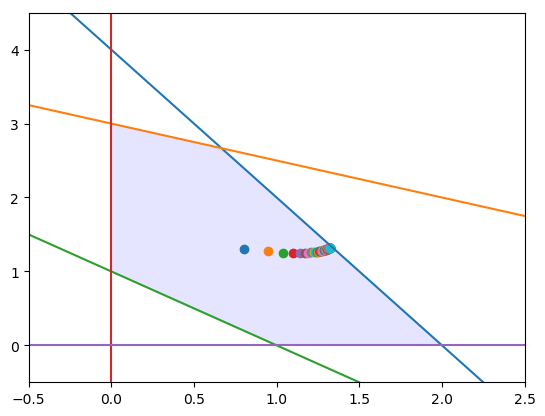

In [217]:


A = [[1 2], [1,0.5], [-1, -1], [0,-1], [-1,0]]
b = [4,3,-1,0,0]

f(x,y) = 2*(x-3)^2 + (y-3)^2
#ϕ(x,y) = -sum([log(b[i] - A[i][2]*x - A[i][1]*y) for i in 1:length(b)])

plot_curve(f)

In [216]:
using JuMP, Ipopt
function plot_minimizer_2d(t,f::Function)
    m = Model(solver = IpoptSolver(print_level=0))
    @variable(m, x)
    @variable(m,y)
    @variable(m,z)
    @variable(m, ψ)
    @constraint(m, cons[i=1:length(b)], A[i][1]*y + A[i][2]*x <= b[i])
    @constraint(m,z == f(x,y))
    @NLexpression(m, ϕ, - sum(log(b[i] - A[i][2]*x - A[i][1]*y) for i in 1:length(b)))
    #@constraint(m,ψ == ϕ(x,y))
    #@NLobjective(m, Min, t*(-x - y) - sum(log(b[i] - A[i][2]*x - A[i][1]*y) for i in 1:length(b)))
    @NLobjective(m, Min, t*z + ϕ)
       setvalue(x,1.2)
    setvalue(y,1.2)
     solve(m);
     xopt = getvalue(x)
     yopt = getvalue(y)
     scatter([xopt], [yopt])
end

function plot_curve(f::Function)
    # The lines to plot
    X = -2:0.1:10
     Y1 = [4 - 2*x for x in X]
     Y2 = [3 - 0.5*x for x in X]
     Y3 = [1 - x for x in X]
    # # Plotting of lines
     plot(X, Y1,X, Y2,X, Y3, [0,0],[-2,5], [-2,10], [0,0])
    # The lines to plot
    X = 0:0.1:10

     Y1 = [4 - 2*x for x in X]
     Y2 = [3 - 0.5*x for x in X]
     Y3 = [1 - x for x in X]
    # The upper edge of polygon (min of lines y1 & y2)
    Y4 = [max(min(Y1[i], Y2[i]),0) for i in 1:length(Y1) ]
    Y5 = [max(0,y) for y in Y3]

    # # Set y-limit, making neg y-values not show in plot
     ylim(-0.5, 4.5)
     xlim(-0.5, 2.5)


    # # Filling between line y3 and line y4
     fill_between(X, Y5, Y4, color=:blue, alpha=0.1)
     show()

    for t in 0.01:0.1:10
        plot_minimizer_2d(t,f)
    end
    
end

plot_curve (generic function with 3 methods)